In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Fama French Five Factor Model

\begin{align*}
R_{it} - R_{Ft} &= a_i + b_i(R_{Mt} - R_{Ft}) + s_i SMB_t + h_i HML_t + r_i RMW_t + c_i CMA_t + e_{it}
\end{align*}

In [3]:
ff_5_factor_daily = pd.read_csv('F-F_Research_Data_5_Factors_2x3_daily.csv')
ff_5_factor_monthly = pd.read_csv('F-F_Research_Data_5_Factors_2x3_monthly.csv')
ff_5_factor_annually = pd.read_csv('F-F_Research_Data_5_Factors_2x3_annually.csv')

ff_5_factor_daily.index = pd.to_datetime(ff_5_factor_daily.index, format='%Y%m%d')
ff_5_factor_monthly.index = pd.to_datetime(ff_5_factor_monthly.index, format='%Y%m')

# Fama French Five Factor model on real life portfolio

In [4]:
portfolio = pd.read_csv('portfolio.csv')
portfolio['Date'] = pd.to_datetime(portfolio['Date'])
portfolio = portfolio.sort_values('Date', ascending=True)
portfolio.reset_index(inplace=True, drop=True)

In [5]:
pvPort = portfolio.pivot(index='Date', columns='Ticker', values='Shares')

In [6]:
tickers = list(portfolio['Ticker'].unique())
period = 'max'
interval = '1d'
prices = yf.download(tickers = tickers, period=period, interval=interval)
closePrices = prices['Adj Close'].dropna()
closePrices.head(5)

[*********************100%%**********************]  17 of 17 completed


Ticker,AAL,COST,GLD,IBKR,K,MSFT,NEE,NKE,NVDA,OXY,PLTR,PYPL,QQQM,SONY,TSM,V,WMT
Date,,,,,,,,,,,,,,,,,
2020-10-13,12.22,352.618805,177.720001,49.700188,54.687244,215.288086,68.971153,124.072212,14.210176,10.215105,9.47,207.740005,118.099014,74.690002,83.760864,198.521439,45.911057
2020-10-14,12.36,350.451294,178.270004,48.535275,54.719986,213.356033,68.781265,122.593353,14.057585,10.147132,9.34,203.600006,117.045334,74.410004,82.789085,196.461533,45.192070
2020-10-15,12.23,348.821075,178.919998,49.034519,54.949158,212.196777,68.282524,123.880180,13.932671,10.302496,9.91,203.139999,116.203392,73.269997,82.368576,193.886780,45.377308
2020-10-16,12.46,353.415405,178.300003,49.377140,54.916420,212.196777,69.916016,122.919861,13.774594,9.797568,9.71,204.449997,115.611176,72.669998,81.013680,194.576614,45.433823
2020-10-19,12.56,347.876251,178.389999,48.300323,54.580860,206.941605,68.531883,122.372498,13.461682,9.535393,9.57,200.059998,113.611137,72.930000,81.817291,191.380020,44.881248


In [7]:
pvPort = pvPort.reindex(closePrices.index)
pvPortCumulative = pvPort.rolling(1).sum().cumsum().ffill().fillna(0)
pvPortCumulative['Value'] = pvPortCumulative.mul(closePrices).sum(axis=1)
pvPortCumulative['Return'] = pvPortCumulative['Value'].pct_change()

In [8]:
pvPortCumulative = pvPortCumulative.dropna().iloc[1:,:]
pvPortCumulative

Ticker,AAL,COST,GLD,IBKR,K,MSFT,NEE,NKE,NVDA,OXY,PLTR,PYPL,QQQM,SONY,TSM,V,WMT,Value,Return
Date,,,,,,,,,,,,,,,,,,,
2022-06-09,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,1547.000027,-0.042105
2022-06-10,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,1471.000004,-0.049127
2022-06-13,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,1331.999969,-0.094494
2022-06-14,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,1294.999981,-0.027778
2022-06-15,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,1331.000042,0.027799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12,100.0,0.0,0.0,0.0,13.0,0.0,5.0,7.0,9.6281,0.0,53.0,14.0,38.8331,9.0,5.4577,1.8815,3.0,15915.915073,-0.001091
2024-08-13,100.0,0.0,0.0,0.0,13.0,0.0,5.0,7.0,9.6281,0.0,53.0,14.0,38.8331,9.0,5.4577,1.8815,3.0,16358.426952,0.027803
2024-08-14,100.0,0.0,0.0,0.0,13.0,0.0,5.0,7.0,9.6281,0.0,53.0,14.0,38.8331,9.0,5.4577,1.8815,3.0,16484.224530,0.007690


In [9]:
ff_5_factor_daily['R_i'] = pvPortCumulative['Return'] * 100
ff5model = ff_5_factor_daily.dropna()
ff5model

,Mkt-RF,SMB,HML,RMW,CMA,RF,R_i
2022-06-09,-2.44,0.44,0.26,0.87,0.15,0.003,-4.210522
2022-06-10,-3.00,0.27,0.65,0.31,0.48,0.003,-4.912736
2022-06-13,-4.13,-0.46,0.59,1.71,-0.37,0.003,-9.449356
2022-06-14,-0.25,0.11,0.13,0.11,0.04,0.003,-2.777777
2022-06-15,1.55,-0.02,-1.68,-0.20,-1.13,0.003,2.779928
...,...,...,...,...,...,...,...
2024-06-24,-0.26,0.63,1.11,0.00,0.65,0.022,-0.800178
2024-06-25,0.31,-0.81,-1.20,0.10,-1.21,0.022,0.892455
2024-06-26,0.16,0.00,-0.20,0.45,-0.27,0.022,-0.240794
2024-06-27,0.14,0.51,-0.36,-1.01,-0.12,0.022,0.779338


<Axes: title={'center': 'Portfolio Returns'}, ylabel='Returns (%)'>

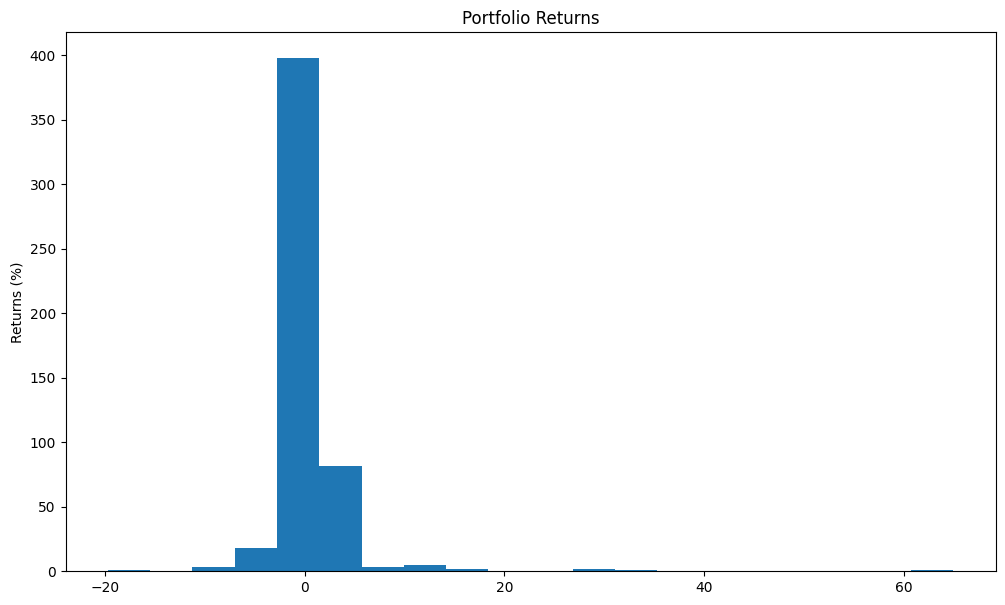

In [10]:
plt.figure(figsize=(12,7))
plt.title('Portfolio Returns')
plt.ylabel('Returns (%)')
ff_5_factor_daily['R_i'].hist(bins=20, grid=False)

In [11]:
import statsmodels.api as sm

y = ff5model['R_i'] - ff5model['RF']
X = ff5model.iloc[:,:5]
X = sm.add_constant(X)
linReg = sm.OLS(y, X)
results = linReg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     14.46
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           2.91e-13
Time:                        23:21:18   Log-Likelihood:                -1465.4
No. Observations:                 516   AIC:                             2943.
Df Residuals:                     510   BIC:                             2968.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4189      0.185      2.269      0.024       0.056       0.782
Mkt-RF         1.3079      0.208      6.299      0.000       0.900       1.716
SMB            0.3896      0.331      1.178      0.239      -0.260       1.039
HML           -0.6699      0.352     -1.904      0.057      -1.361       0.021
RMW            0.1617      0.386      0.419      0.676      -0.597       0.920
CMA            0.3550      0.523      0.679      0.497      -0.672       1.382
==============================================================================
Omnibus:                      793.501   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           242979.982
Skew:                           8.503   Prob(JB):                         0.00
Kurtosis:                     107.939   Cond. No.                         4.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$a_i = 0.4189 > 0$ with a p-value $< 0.05$ shows that the the portfolio can be built with non-zero return while having no exposure to the five factors.

$b_i$ is the coefficient of the term, $R_M - R_F$, which is the sensitivity to market excess return. The model indicates that $b_i = 1.3079$ with a p-value $= 0 < 0.05$ which means the portfolio tends to move along with the market. For every $1%$ increase in market excess return, the portfolio's return would increase by $1.31%$

$s_i$ is the coefficient of the term, $SMB$, which is the sensitivity to the size factor. $s_i = 0.3896$ means that the portfolio's performance is positively correlated with the size factor suggesting the portfolio's returns are benefited from small-cap stocks's outperformance to large-cap stocks.

$h_i$ is the coefficient of the term, $HML$, which is the sensitivity to the value factor. $h_i = -0.6699$ indicates that the portfolio's returns are negatively correlated with the value factor suggesting the portfolio has a tilt towards growth stocks instead of value stocks.

$r_i$ is the coefficient of the term, $RMW$, which is the sensitivity to the profitability factor. $r_i = 0.1617$ indicates that the portfolio contains stocks with high profitability.

$c_i$ is the coefficient of the term, $CMA$, which is the sensitivity to the investment factor. $c_i = 0.3555$ indicates that the portfolio is associated with companies that invest more aggressively as it is positively correlated with the term.

Do note that the p-values of $SMB$, $HML$, $RMW$ and $CMA$ are all deemed to be insignificant on a $0.05$ significance level.

# Applying model on simulated portfolio

Let's create a portfolio based on the factors assuming we began managing the portfolio on 2021-01-01 and assess the returns using the Fama French Five Factor model

In [12]:
simulated_portfolio = {
    'CWEN': 0.2,
    'NEE': 0.15,
    'PLTR': 0.25,
    'TSM': 0.2,
    'OXY': 0.1,
    'T': 0.1
}

In [13]:
def get_price(portfolio, freq='D', startDate=None):
    tickers = list(portfolio.keys())
    period = 'max'
    if freq == 'D':
        interval = '1d'
        ff_data = ff_5_factor_daily
    elif freq == 'M':
        interval = '1mo'
        ff_data = ff_5_factor_monthly
    elif freq == 'Y':
        interval = '1y'
        ff_data = ff_5_factor_annually
        
    prices = yf.download(tickers = tickers, period=period, interval=interval)
    adjClosePrices = prices['Adj Close']
    if startDate:
        adjClosePrices = adjClosePrices[adjClosePrices.index >= startDate]
    returns = adjClosePrices.pct_change()[1:] * 100

    ff_5_factor_model = ff_data.copy(deep=True)
    
    if len(tickers) > 1:
        ff_5_factor_model['R_i'] = returns.apply(lambda x: x.mul(list(portfolio.values())), axis=1).sum(axis=1)
    else:
        ff_5_factor_model['R_i'] = returns
    ff_5_factor_model = ff_5_factor_model.dropna()

    return ff_5_factor_model, returns


portfolio = simulated_portfolio
portfolio_ff_model, portfolio_returns = get_price(portfolio, freq='D', startDate='2021-01-01')

[*********************100%%**********************]  6 of 6 completed


<Axes: title={'center': 'Portfolio Returns'}, ylabel='Returns (%)'>

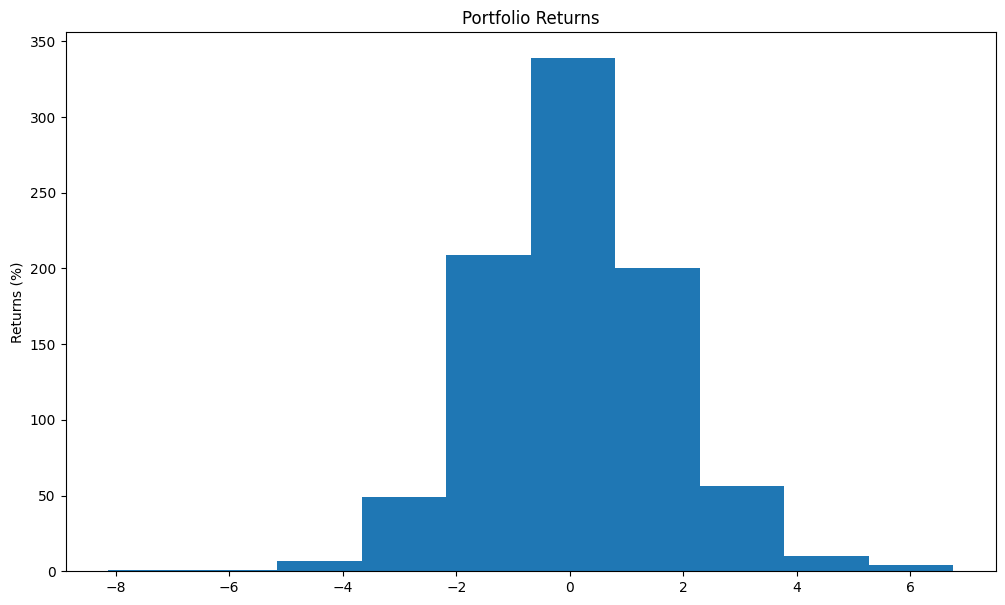

In [14]:
plt.figure(figsize=(12,7))
plt.title('Portfolio Returns')
plt.ylabel('Returns (%)')
portfolio_ff_model['R_i'].hist(grid=False)

In [15]:
import statsmodels.api as sm

y = portfolio_ff_model['R_i'] - portfolio_ff_model['RF']
X = portfolio_ff_model.iloc[:,:5]
X = sm.add_constant(X)

linReg = sm.OLS(y, X)
result = linReg.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     326.0
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          1.40e-196
Time:                        23:21:19   Log-Likelihood:                -1192.0
No. Observations:                 876   AIC:                             2396.
Df Residuals:                     870   BIC:                             2425.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0568      0.032      1.768      0.077      -0.006       0.120
Mkt-RF         1.0083      0.034     29.588      0.000       0.941       1.075
SMB            0.2029      0.053      3.829      0.000       0.099       0.307
HML            0.1793      0.051      3.522      0.000       0.079       0.279
RMW           -0.6510      0.060    -10.877      0.000      -0.768      -0.533
CMA            0.2288      0.081      2.811      0.005       0.069       0.388
==============================================================================
Omnibus:                      179.698   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.324
Skew:                           0.886   Prob(JB):                    1.32e-170
Kurtosis:                       7.277   Cond. No.                         3.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Apart from the intercept ($a_i$), other coefficients are all significant on a $0.05$ significance level meaning the portfolio has exposure to all five factors.

Similar to the real life portfolio analysis, $b_i = 1.0083$ with a p-value of $0.00$ indicates that the portfolio tends to move along with the market. For every $1%$ increase in market excess return, the portfolio's return would increase by $1.0083%$.

A positive $SMB$ coefficient, $s_i = 0.2029$, shows that the portfolio is positively correlated to the size factor. It benefits from small-cap stocks' outperformance.

$h_i = 0.1793 > 0$ indicates that the portfolio is positively correlated with the value factor. It suggests that the portfolio tilts towards growth stocks.

$r_i = -0.6510 < 0$ shows that the portfolio is negatively correlated with the profitability factor, suggesting the portfolio associates with companies that have low profitbability within the period.

$c_i = 0.2288 > 0$ suggests that the portfolio associates with companies that invest aggressively.